In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, roc_curve

#loading data
df = pd.read_csv('WineQT.csv')
print("Data Loaded.")

Data Loaded.


In [2]:
#Interaction Feature: Alcohol * Sulphates (Potency)
df['alcohol_sulphates']=df['alcohol']*df['sulphates']

#Interaction Feature: Total Acidity (Fixed * Volatile)
df['acidity_interaction']=df['fixed acidity']*df['volatile acidity']

#Ratio Feature: Sulfur Ratio
#Adding 0.001 to avoid dividing by zero errors
df['sulfur_ratio']=df['total sulfur dioxide']/(df['free sulfur dioxide']+0.001)

#create binary target
df['quality_bin']=df['quality'].apply(lambda x: 1 if x >= 6 else 0)

#check new columns
print(df[['alcohol_sulphates','acidity_interaction','sulfur_ratio']].head())

   alcohol_sulphates  acidity_interaction  sulfur_ratio
0              5.264                5.180      3.090628
1              6.664                6.864      2.679893
2              6.370                5.928      3.599760
3              5.684                3.136      3.529204
4              5.264                5.180      3.090628


In [3]:
#drop old target and ID
X=df.drop(['quality','quality_bin','Id'],axis=1)
y=df['quality_bin']

#splitting data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#scaling
scaler=StandardScaler()

#fit on training data, then transform both train and test
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

print("Data Scaled Successfully.")

Data Scaled Successfully.


SVM ROC-AUC Score: 0.8336
Logistic Regression ROC-AUC Score: 0.8208


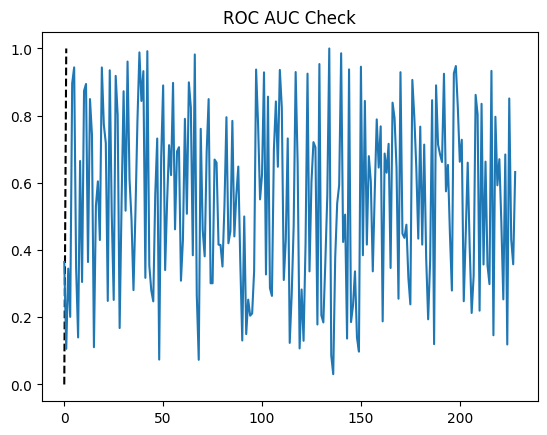

In [4]:
#train svm
#probability=True is needed to calculate ROC-AUC
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)

#train logistic regression
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train_scaled, y_train)

#getting probability scores
svm_probs = svm_model.predict_proba(X_test_scaled)[:, 1]
log_probs = log_model.predict_proba(X_test_scaled)[:, 1]

#calculate ROC-AUC Score
svm_auc = roc_auc_score(y_test, svm_probs)
log_auc = roc_auc_score(y_test, log_probs)

print(f"SVM ROC-AUC Score: {svm_auc:.4f}")
print(f"Logistic Regression ROC-AUC Score: {log_auc:.4f}")

#plot
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(svm_probs, label=f'SVM (AUC={svm_auc:.2f})') #simplified plot
plt.title("ROC AUC Check")
plt.show()